In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

data = pd.read_excel('produksiPadi.xlsx')

data.head()


,Tahun,Produksi Padi(Ton)
0,1970,18693649.0
1,1971,20483687.0
2,1972,19393933.0
3,1973,21490578.0
4,1974,22476073.0


In [59]:
data.describe()

,Tahun,Produksi Padi(Ton)
count,53.000000,5.300000e+01
mean,1996.000000,4.694139e+07
std,15.443445,1.632983e+07
min,1970.000000,1.869365e+07
25%,1983.000000,3.530311e+07
50%,1996.000000,4.937705e+07
75%,2009.000000,5.460403e+07
max,2022.000000,8.114862e+07


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tahun               53 non-null     int64  
 1   Produksi Padi(Ton)  53 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 980.0 bytes


In [61]:
data.corr()
#nilai korelasi sangat tinggi 0.91, karena fitur hanya 2

,Tahun,Produksi Padi(Ton)
Tahun,1.000000,0.918377
Produksi Padi(Ton),0.918377,1.000000


In [62]:
# Lagging
# pengubahan data dengan lagging membantu model memahami hubungan langsung dengan produksi periode tahun sebelumnya.

data['Produksi Lag-1'] = data['Produksi Padi(Ton)'].shift(1) #periode produksi 1 tahun sebelumnya
data['Produksi Lag-2'] = data['Produksi Padi(Ton)'].shift(2) #periode produksi 2 tahun sebelumnya

# Menghapus baris dengan NaN 
data_clear = data.dropna()

# data setelah lagging
data_clear.head(10)

data_clear.to_excel('produksiPadi_lagged.xlsx', index=False)

In [63]:
# Memisahkan fitur (X) dan target (y)
X = data_clear[['Tahun','Produksi Lag-1','Produksi Lag-2']] #input
y = data_clear['Produksi Padi(Ton)']

# Split ratio 70:30 (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
# Membuat model regresi linear
model = LinearRegression()

# Training model
model.fit(X_train, y_train)

# Memprediksi data testing
y_pred_test = model.predict(X_test)

In [65]:
print(model.coef_)
print(model.intercept_)

[ 3.59798389e+04  1.18622070e+00 -2.07699634e-01]
-70091804.48798814


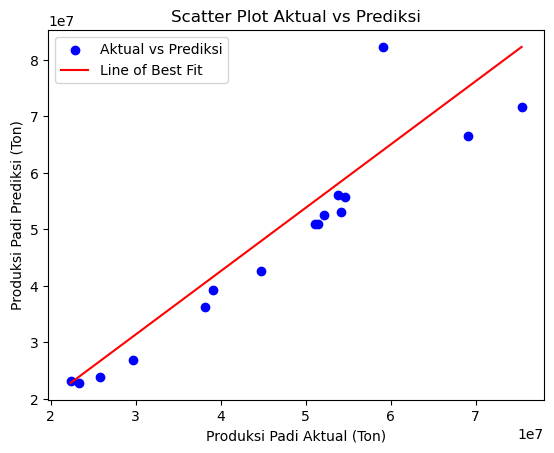

In [66]:
model.score(X_test, y_test)

# Scatter plot untuk data aktual vs prediksi
plt.scatter(y_test, y_pred_test, color='blue', label='Aktual vs Prediksi')

# Plot garis prediksi
plt.plot([min(y_test), max(y_test)], [min(y_pred_test), max(y_pred_test)], color='r', linestyle='-', label='Line of Best Fit')

plt.xlabel('Produksi Padi Aktual (Ton)')
plt.ylabel('Produksi Padi Prediksi (Ton)')
plt.legend()
plt.title('Scatter Plot Aktual vs Prediksi')
plt.show()


In [67]:
# evaluasi
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print(f'MSE: {mse_test}')
print(f'RMSE: {rmse_test}')
print(f'MAPE: {mape_test}')


MSE: 36651204389919.91
RMSE: 6054023.818083301
MAPE: 0.05640882265042309


In [68]:
# jika ingin memprediksi tahun yang baru, karena menggunakan lag-1&2 sebagai fitur input
# maka harus mengambil data periode tahun sebelumnya untuk lag-1 dan periode 2 tahun sebelumnya untuk lag-2
# sebagai inputan

# Mengambil data produksi tahun 2022 dan 2021
lag_1 = data_clear.loc[data_clear['Tahun'] == 2022, 'Produksi Padi(Ton)'].values[0]
lag_2 = data_clear.loc[data_clear['Tahun'] == 2021, 'Produksi Padi(Ton)'].values[0]

# Data input untuk prediksi tahun 2023
input_2023 = pd.DataFrame({
    'Tahun': [2023],  # Tahun 2023 sebagai input
    'Produksi Lag-1': [lag_1],  # Produksi tahun 2022
    'Produksi Lag-2': [lag_2]   # Produksi tahun 2021
})

# Prediksi Produksi Padi Tahun 2023
prediksi_2023 = model.predict(input_2023)[0]
print(f"Prediksi Produksi Padi Tahun 2023: {prediksi_2023} ton")


Prediksi Produksi Padi Tahun 2023: 55977968.541193366 ton


In [69]:
# Prediksi untuk tahun 2024, menggunakan prediksi tahun 2023 sebagai Lag-1

input_2024 = pd.DataFrame({
    'Tahun': [2024],  # Tahun 2024 sebagai input
    'Produksi Lag-1': [prediksi_2023],  # Menggunakan prediksi 2023 sebagai input untuk Lag-1
    'Produksi Lag-2': [data_clear.loc[data_clear['Tahun'] == 2022, 'Produksi Padi(Ton)'].values[0]]   # Produksi tahun 2022
})

# Prediksi Produksi Padi Tahun 2024
prediksi_2024 = model.predict(input_2024)[0]
print(f"Prediksi Produksi Padi Tahun 2024: {prediksi_2024} ton")

Prediksi Produksi Padi Tahun 2024: 57847546.2765041 ton
